In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

In [40]:
def bandpass_filter(data, lowcut, highcut, fs, order=3):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = signal.butter(order, [low, high], btype='band')
    return signal.filtfilt(b, a, data)

In [41]:
ppg_sr = 256

In [42]:
data = pd.read_csv('/home/ilya/Documents/stress-level-by-PPG/dataframe/shoulder.csv')
display(data.head())

ppg = data["afe_LED1ABSVAL"][0 : ppg_sr * 200]
ppg = bandpass_filter(ppg, 1, 3, ppg_sr)


,device_name,comment,package_number,time,eda,accel_X,accel_Y,accel_Z,afe_LED1ABSVAL,battery,temperature,package_num
0,shoulder,device,29,2025-03-22 23:46:24.656276,756,65509,65533,64542,16557002,3947,0,40
1,shoulder,device,29,2025-03-22 23:46:24.656367,750,65509,65533,64542,16544756,3933,0,40
2,shoulder,device,29,2025-03-22 23:46:24.656383,750,65509,65533,64542,16534144,3947,0,40
3,shoulder,device,29,2025-03-22 23:46:24.656563,750,65509,65533,64542,16532926,3933,0,40
4,shoulder,device,29,2025-03-22 23:46:24.656596,750,65509,65533,64542,16532351,3933,0,40


[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25
 3.5  3.75 4.   4.25 4.5  4.75 5.  ]


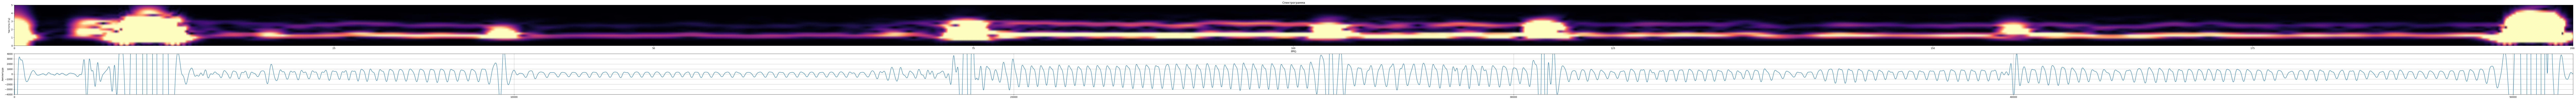

In [43]:
frequencies, times, Zxx = signal.stft(
    ppg, 
    fs=256, 
    window='hann', 
    nperseg=1024,
    noverlap=1000
)

spectrogram = np.abs(Zxx)
# print(frequencies)

# Маска для целевой частоты
min_fr = 0
max_fr = 5
freq_mask = (frequencies >= min_fr) & (frequencies <= max_fr)
print(frequencies[freq_mask])

# Амплитуда в целевой полосе
amplitude_in_band = np.mean(np.abs(Zxx[freq_mask, :]), axis=0)

wight = len(ppg) / 256
plt.figure(figsize=(wight, 7))

plt.subplot(2, 1, 1)
plt.pcolormesh(times, frequencies[freq_mask], spectrogram[freq_mask, : ], shading='gouraud', cmap='magma', vmin = 0, vmax=500)
# plt.colorbar(label='Амплитуда (дБ)')
plt.ylabel('Частота (Гц)')
plt.title('Спектрограмма')

plt.subplot(2, 1, 2)
plt.plot(ppg)
plt.ylabel('Амплитуда')
plt.title(f'PPG')
plt.grid(True)
plt.margins(x=0)
plt.ylim(-4000, 4000)

plt.savefig(f'/home/ilya/Documents/stress-level-by-PPG/spgrm_ppg_st.png', dpi=300, bbox_inches='tight')

plt.show()

plt.close()